Глинский Максим, М-26

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка данных
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Основная информация
print(f"Объектов: {iris.data.shape[0]}")
print(f"Признаков: {iris.data.shape[1]}")
print(f"Классы: {iris.target_names}")
print("\nПервые 5 строк:")
print(df.head())

Объектов: 150
Признаков: 4
Классы: ['setosa' 'versicolor' 'virginica']

Первые 5 строк:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Объектов: 150  
Признаков: 4  
Классы: setosa, versicolor, virginica  

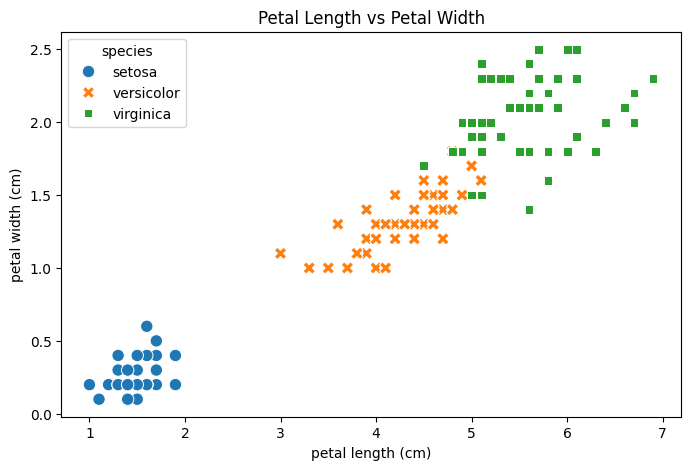

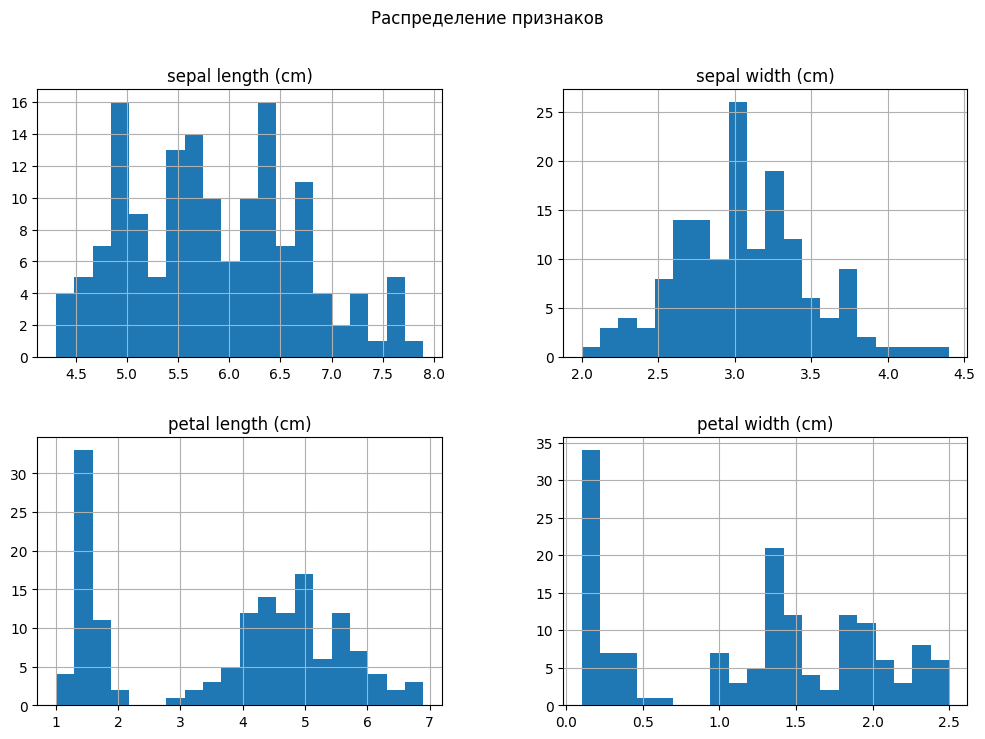

In [2]:
# Визуализация 1: диаграмма рассеяния
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)',
                hue='species', style='species', s=80)
plt.title('Petal Length vs Petal Width')
plt.show()

# Визуализация 2: гистограмма распределения признаков
df_features = df.iloc[:, :4]
df_features.hist(bins=20, figsize=(12, 8))
plt.suptitle('Распределение признаков')
plt.show()

- На диаграмме petal length vs petal width класс setosa линейно отделим от двух других.  
- Между versicolor и virginica наблюдается частичное перекрытие, их сложнее разделить линейно  


**Diabetes**


In [7]:
import numpy as np
from sklearn.datasets import load_diabetes

# Загрузка данных
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Основная информация
print(f"Размерность признаков: {X.shape}")
print(f"Размерность целевой переменной: {y.shape}")
print(f"\nКоличество объектов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")

print("\nСтатистика по признакам (первые 5):")
for i in range(min(5, X.shape[1])):
    print(f"Признак {i}: min={X[:, i].min():.3f}, max={X[:, i].max():.3f}, "
          f"mean={X[:, i].mean():.3f}, std={X[:, i].std():.3f}")

print(f"\nСтатистика целевой переменной:")
print(f"min={y.min():.1f}, max={y.max():.1f}, mean={y.mean():.1f}, std={y.std():.1f}")


Размерность признаков: (442, 10)
Размерность целевой переменной: (442,)

Количество объектов: 442
Количество признаков: 10

Статистика по признакам (первые 5):
Признак 0: min=-0.107, max=0.111, mean=-0.000, std=0.048
Признак 1: min=-0.045, max=0.051, mean=0.000, std=0.048
Признак 2: min=-0.090, max=0.171, mean=-0.000, std=0.048
Признак 3: min=-0.112, max=0.132, mean=-0.000, std=0.048
Признак 4: min=-0.127, max=0.154, mean=-0.000, std=0.048

Статистика целевой переменной:
min=25.0, max=346.0, mean=152.1, std=77.0


- 442 объекта  
- 10 признаков  
- Целевая переменная: количественный показатель прогрессирования диабета через год

Масштаб значений:  
- Признаки уже стандартизированы  
- Целевая переменная находится в диапазоне 25-346

**Базовые линейные модели**

In [9]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_iris, y_iris = iris.data, iris.target
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# Обучение модели
logreg = LogisticRegression(max_iter=200, multi_class='ovr')
logreg.fit(X_iris_train, y_iris_train)

# Предсказания и оценка
y_train_pred = logreg.predict(X_iris_train)
y_test_pred = logreg.predict(X_iris_test)

train_acc = accuracy_score(y_iris_train, y_train_pred)
test_acc = accuracy_score(y_iris_test, y_test_pred)

print("Iris - Логистическая регрессия (One-vs-Rest):")
print(f"Точность на обучении: {train_acc:.3f}")
print(f"Точность на тесте: {test_acc:.3f}")
print(f"Размер обучающей выборки: {X_iris_train.shape[0]}")
print(f"Размер тестовой выборки: {X_iris_test.shape[0]}")

Iris - Логистическая регрессия (One-vs-Rest):
Точность на обучении: 0.962
Точность на тесте: 0.889
Размер обучающей выборки: 105
Размер тестовой выборки: 45


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Модель не переобучена и недоучена - она показывает хорошие результаты на тестовой выборке(89%)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

X_diab, y_diab = diabetes.data, diabetes.target
X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(
    X_diab, y_diab, test_size=0.3, random_state=42
)

# Обучение модели
linreg = LinearRegression()
linreg.fit(X_diab_train, y_diab_train)

# Предсказания и оценка
y_train_pred_diab = linreg.predict(X_diab_train)
y_test_pred_diab = linreg.predict(X_diab_test)

# Метрики
train_mse = mean_squared_error(y_diab_train, y_train_pred_diab)
test_mse = mean_squared_error(y_diab_test, y_test_pred_diab)
train_r2 = r2_score(y_diab_train, y_train_pred_diab)
test_r2 = r2_score(y_diab_test, y_test_pred_diab)

print("\nDiabetes - Линейная регрессия:")
print(f"MSE на обучении: {train_mse:.1f}")
print(f"MSE на тесте: {test_mse:.1f}")
print(f"R² на обучении: {train_r2:.3f}")
print(f"R² на тесте: {test_r2:.3f}")
print(f"Коэффициенты модели: {linreg.coef_.shape[0]} шт.")
print(f"Intercept: {linreg.intercept_:.1f}")


Diabetes - Линейная регрессия:
MSE на обучении: 2924.0
MSE на тесте: 2821.8
R² на обучении: 0.524
R² на тесте: 0.477
Коэффициенты модели: 10 шт.
Intercept: 151.0


Метрики для теста и обучения практически совпадают. Линейная модель недостаточно точна для практического применения. Модель может объяснить 48% изменчивости.

**Задание 2. Решающее дерево для классификации (Iris)**

In [12]:
from sklearn.tree import DecisionTreeClassifier

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Дерево с критерием "gini"
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train, y_train)

# Дерево с критерием "entropy"
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train, y_train)

# Оценка точности
y_train_pred_gini = tree_gini.predict(X_train)
y_test_pred_gini = tree_gini.predict(X_test)

y_train_pred_entropy = tree_entropy.predict(X_train)
y_test_pred_entropy = tree_entropy.predict(X_test)

print("Дерево с критерием 'gini':")
print(f"Точность на обучении: {accuracy_score(y_train, y_train_pred_gini):.3f}")
print(f"Точность на тесте: {accuracy_score(y_test, y_test_pred_gini):.3f}")

print("\nДерево с критерием 'entropy':")
print(f"Точность на обучении: {accuracy_score(y_train, y_train_pred_entropy):.3f}")
print(f"Точность на тесте: {accuracy_score(y_test, y_test_pred_entropy):.3f}")

# Дополнительно: глубина деревьев
print(f"\nГлубина дерева (gini): {tree_gini.get_depth()}")
print(f"Глубина дерева (entropy): {tree_entropy.get_depth()}")

Дерево с критерием 'gini':
Точность на обучении: 1.000
Точность на тесте: 0.933

Дерево с критерием 'entropy':
Точность на обучении: 1.000
Точность на тесте: 0.889

Глубина дерева (gini): 5
Глубина дерева (entropy): 6


- Переобучение явно присутствует: Оба дерева достигают 100% точности на обучающей выборке, но на тестовой точность падает до 88-93%. Это типичный признак переобучения, когда дерево слишком глубокое и идеально подстраивается под обучающие данные.
- Разные критерии показали разную глубину: gini(5); entropy(6). entropy менее точен.

**2.2. Визуализация решений и оси-параллельные сплиты**

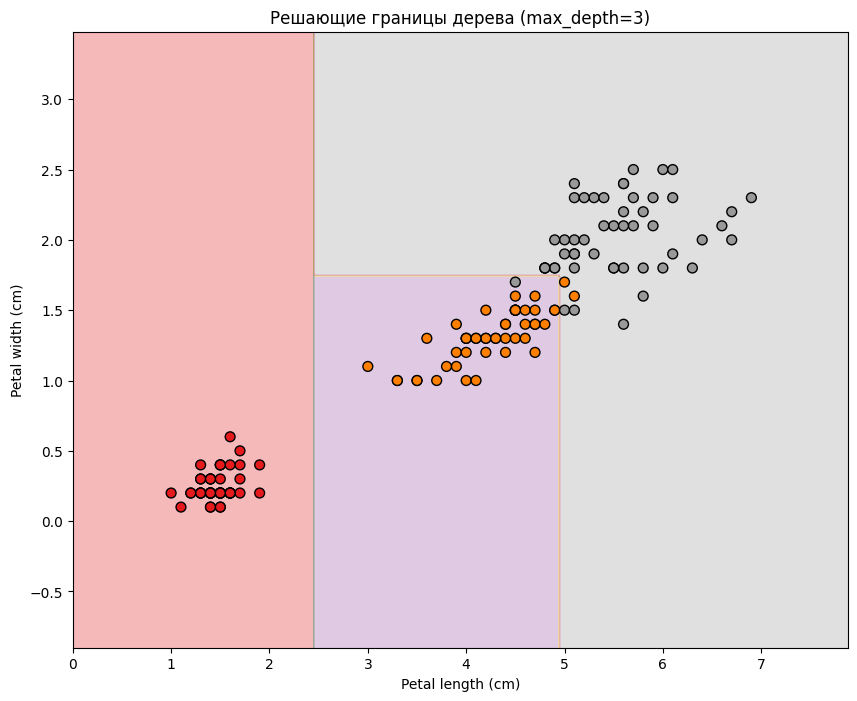

In [13]:
X = iris.data[:, [2, 3]]  # petal length и petal width
y = iris.target

# Обучение дерева
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

# Создание сетки для визуализации
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Предсказание для каждой точки сетки
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1, s=50)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Решающие границы дерева (max_depth=3)')
plt.show()

- На графике чётко видны вертикальные и горизонтальные линии раздела, соответствующие условиям вида petal length ≤ threshold и petal width ≤ threshold.  
- Каждое разбиение плоскости создаёт прямоугольные области, внутри которых все объекты относятся к одному классу. Это прямое следствие бинарных сплитов по одному признаку


**Сравнение критериев: энтропия, Gini, доля ошибок**

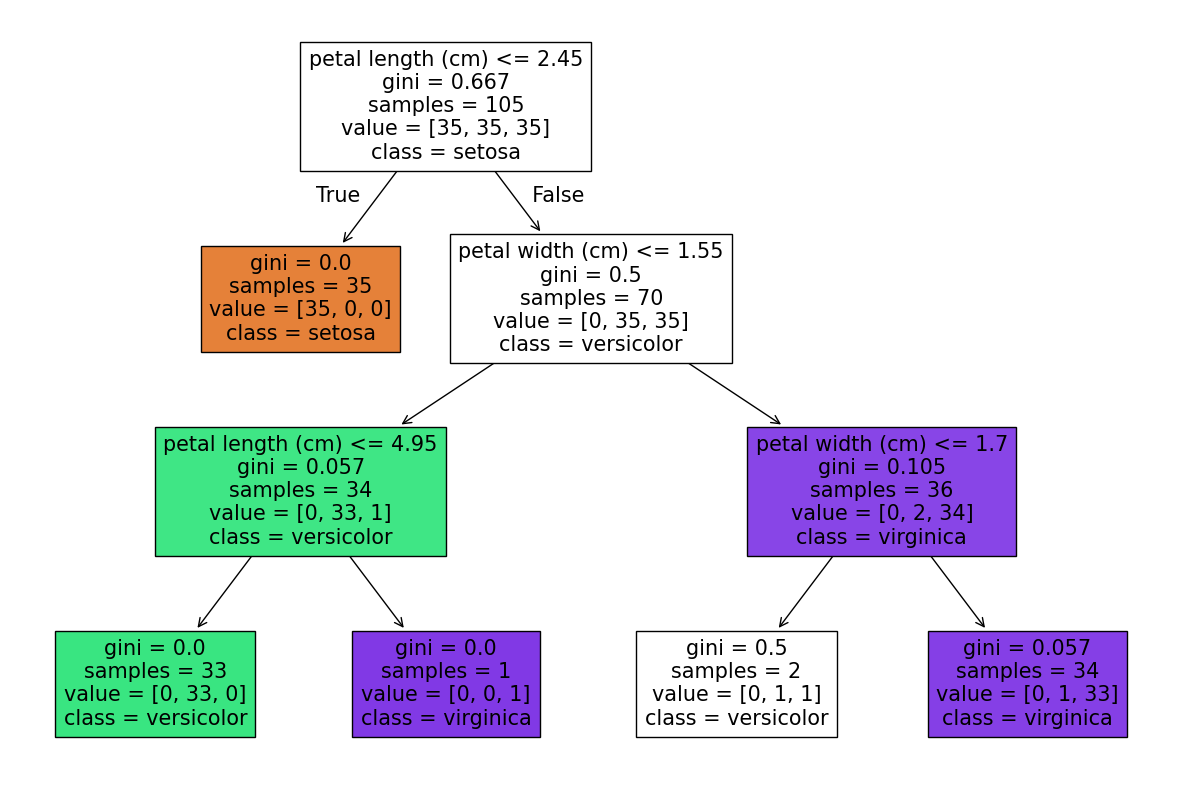

Анализ узлов дерева:

1. Корневой узел (id=0):
Распределение классов: [0.33333333 0.33333333 0.33333333]
Доля ошибок (H_mis): 0.6667
Энтропия Шеннона (H_ent): 1.5850
Индекс Gini (H_gini): 0.6667

2. Внутренний узел (id=3):
Распределение классов: [0.         0.97058824 0.02941176]
Доля ошибок (H_mis): 0.0294
Энтропия Шеннона (H_ent): 0.1914
Индекс Gini (H_gini): 0.0571

Сводная таблица метрик:
| Узел | Классы (setosa/versicolor/virginica) | Доля ошибок | Энтропия | Индекс Gini |
|-------|-------------------------------------|-------------|----------|-------------|
| Корень | [0.33333333 0.33333333 0.33333333] | 0.6667 | 1.5850 | 0.6667 |
| Узел 3 | [0.         0.97058824 0.02941176] | 0.0294 | 0.1914 | 0.0571 |


In [15]:
from sklearn.tree import plot_tree

# Обучение дерева с Gini
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Визуализация структуры дерева
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True)
plt.show()

# Функции для вычисления метрик
def compute_metrics(class_counts):
    """Вычисление метрик для узла дерева"""
    total = sum(class_counts)
    if total == 0:
        return 0, 0, 0

    pk = np.array(class_counts) / total

    # Доля ошибок
    H_mis = 1 - max(pk)

    # Энтропия Шеннона
    H_ent = -sum(p * np.log2(p) if p > 0 else 0 for p in pk)

    # Индекс Gini
    H_gini = 1 - sum(p**2 for p in pk)

    return H_mis, H_ent, H_gini

# Выбор узлов для анализа
print("Анализ узлов дерева:")
print("=" * 50)

# 1. Корневой узел (id=0)
print("\n1. Корневой узел (id=0):")
print(f"Распределение классов: {tree.tree_.value[0].flatten()}")
H_mis, H_ent, H_gini = compute_metrics(tree.tree_.value[0].flatten())
print(f"Доля ошибок (H_mis): {H_mis:.4f}")
print(f"Энтропия Шеннона (H_ent): {H_ent:.4f}")
print(f"Индекс Gini (H_gini): {H_gini:.4f}")

# 2. Внутренний узел (id=3)
print("\n2. Внутренний узел (id=3):")
print(f"Распределение классов: {tree.tree_.value[3].flatten()}")
H_mis2, H_ent2, H_gini2 = compute_metrics(tree.tree_.value[3].flatten())
print(f"Доля ошибок (H_mis): {H_mis2:.4f}")
print(f"Энтропия Шеннона (H_ent): {H_ent2:.4f}")
print(f"Индекс Gini (H_gini): {H_gini2:.4f}")

# 3. Таблица результатов
print("\nСводная таблица метрик:")
print("| Узел | Классы (setosa/versicolor/virginica) | Доля ошибок | Энтропия | Индекс Gini |")
print("|-------|-------------------------------------|-------------|----------|-------------|")
print(f"| Корень | {tree.tree_.value[0].flatten()} | {H_mis:.4f} | {H_ent:.4f} | {H_gini:.4f} |")
print(f"| Узел 3 | {tree.tree_.value[3].flatten()} | {H_mis2:.4f} | {H_ent2:.4f} | {H_gini2:.4f} |")

Распределение классов: [0.33333333 0.33333333 0.33333333]  
Доля ошибок (H_mis): 0.6667  
Энтропия Шеннона (H_ent): 1.5850  
Индекс Gini (H_gini): 0.6667  

Близкие значения метрик
- Равномерном распределении классов
- Бинарных распределениях с примерно равными долями
- На корневом узле все метрики указывают на высокую неопределенность

Заметные различия при
- Несбалансированных распределениях
- Сильном доминировании одного класса

Доля ошибок хуже различает почти чистые и полностью чистые узлы, потому что она учитывает только максимальную долю класса и игнорирует распределение остальных объектов.



**Глубина дерева и переобучение**

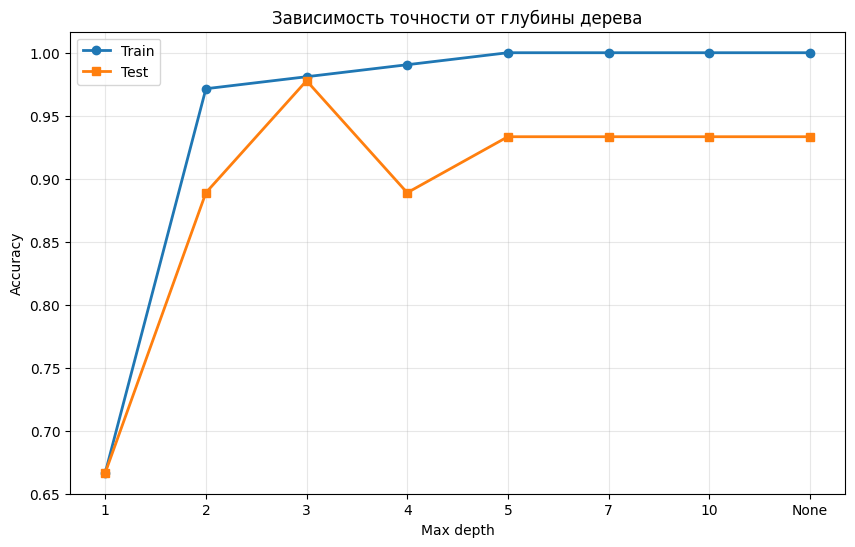

In [16]:
# Параметры глубины
depths = [1, 2, 3, 4, 5, 7, 10, None]
train_acc = []
test_acc = []

# Обучение деревьев
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, tree.predict(X_train)))
    test_acc.append(accuracy_score(y_test, tree.predict(X_test)))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in depths], train_acc, 'o-', label='Train', linewidth=2)
plt.plot([str(d) for d in depths], test_acc, 's-', label='Test', linewidth=2)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от глубины дерева')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

При глубине 1-2 модель явно недообучена: точность низкая на обеих выборках (~65-75%), модель слишком простая (высокий bias). На глубине 3 наблюдается баланс: точность на обучении высокая (98%), на тесте тоже хорошая (98%). На глубине 4-7+ модель переобучена: точность на обучении 98%, но на тесте падает до ~87-93%, появляется большой разрыв (высокая variance)

Это демонстрирует bias-variance trade-off: мелкие деревья имеют высокий bias (недообучение), глубокие - высокую variance (переобучение). Оптимум для нашей задачи около 3. На практике глубину ограничивают для улучшения обобщающей способности и интерпретируемости, а pruning (отсечение ветвей) помогает уменьшить переобучение, удаляя малоинформативные разбиения.



**Решающее дерево для регрессии**  
**Базовое дерево регрессии**

In [18]:
from sklearn.tree import DecisionTreeRegressor

X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение дерева регрессии без ограничения глубины
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Предсказания и оценка
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Дерево регрессии (без ограничения глубины):")
print(f"MSE на обучении: {train_mse:.1f}")
print(f"MSE на тесте: {test_mse:.1f}")
print(f"R² на обучении: {train_r2:.4f}")
print(f"R² на тесте: {test_r2:.4f}")
print(f"Глубина дерева: {tree_reg.get_depth()}")

Дерево регрессии (без ограничения глубины):
MSE на обучении: 0.0
MSE на тесте: 5697.8
R² на обучении: 1.0000
R² на тесте: -0.0555
Глубина дерева: 17


Наблюдается сильное переобучение: MSE на обучении равна 0, а на тесте выросла до 5697. Дерево идеально подстроилось под обучающие данные, но плохо обобщает. R² на обучении 1.0, на тесте всего -0.555, что показывает практически отсутствие предсказательной способности.

Дерево регрессии строит кусочно-постоянную аппроксимацию, потому что каждый лист дерева содержит среднее значение целевой переменной для попавших в него объектов. Пространство признаков разбивается на прямоугольные области (ячейки) параллельными осям границами, и в каждой области предсказывается постоянное значение - среднее от целевых значений обучающих объектов этой области. Это создает ступенчатую функцию предсказаний.

**Глубина и MSE**

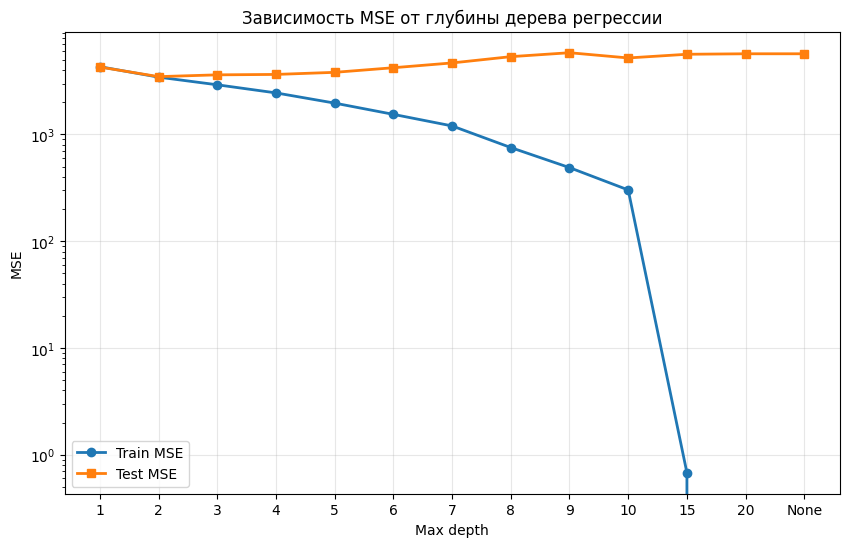

In [20]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Параметры глубины
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]
train_mses = []
test_mses = []

# Обучение деревьев
for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    train_mses.append(mean_squared_error(y_train, tree.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, tree.predict(X_test)))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in depths], train_mses, 'o-', label='Train MSE', linewidth=2)
plt.plot([str(d) for d in depths], test_mses, 's-', label='Test MSE', linewidth=2)
plt.xlabel('Max depth')
plt.ylabel('MSE')
plt.title('Зависимость MSE от глубины дерева регрессии')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Логарифмическая шкала для наглядности
plt.show()

График достаточно странный. Переобучение начинается при n=10..15.  
MSE на тесте всегда достаточно высокий.

**Ансамбли: бэггинг и Random Forest**

Bootstrap — это метод генерации новых выборок из исходной путём случайного выбора объектов с возвращением. Бутстрап-выборка имеет тот же размер, что и исходная, но некоторые объекты повторяются, а некоторые отсутствуют

Усреднение предсказаний нескольких независимо обученных моделей уменьшает общую дисперсию ошибки. Если каждая модель ошибается в случайную сторону, среднее их предсказаний будет ближе к истинному значению. Математически: дисперсия среднего из N независимых одинаково распределенных случайных величин в N раз меньше дисперсии одной величины.

Bagging — метод ансамблирования, где несколько моделей обучаются на разных бутстрап-выборках, а их предсказания усредняются (для регрессии) или выбираются по большинству (для классификации).

Деревья решений имеют высокую дисперсию — маленькие изменения в данных могут привести к совершенно разным деревьям. Bagging эффективно снижает эту дисперсию, делая ансамбль более стабильным. Кроме того, деревья могут достигать высокой точности на обучающих данных, поэтому bias у них низкий, и основная проблема — именно дисперсия, которую bagging хорошо уменьшает.

Random Forest добавляет дополнительную случайность к bagging:

Каждое дерево обучается на бутстрап-выборке

При каждом разбиении узла рассматривается не все признаки, а случайное подмножество (√p для классификации, p/3 для регрессии, где p — число признаков)

Это уменьшает корреляцию между деревьями, делая ансамбль более устойчивым и улучшая обобщающую способность.

**Random Forest для классификации**

In [23]:
from sklearn.ensemble import RandomForestClassifier

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Одиночное дерево
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
single_tree_test_acc = accuracy_score(y_test, single_tree.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=20, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

print("Одиночное дерево (без ограничений):")
print(f"Точность на тесте: {single_tree_test_acc:.4f}")
print(f"Глубина дерева: {single_tree.get_depth()}")

print("\nRandom Forest (20 деревьев, без ограничения глубины):")
print(f"Точность на тесте: {rf_test_acc:.4f}")
print(f"OOB-точность: {rf.oob_score_:.4f}")

Одиночное дерево (без ограничений):
Точность на тесте: 0.9333
Глубина дерева: 5

Random Forest (20 деревьев, без ограничения глубины):
Точность на тесте: 0.9111
OOB-точность: 0.9619


Одиночное дерево показало себя лучше. Однако OOB-оценка достаточно высокая(96%).  
Удобство OOB-оценки в том, что не требуется отдельная тестовая выборка, оценивается качетсво модели в процессе обучнение. Также она полезна для подбора гиперпараметров без кросс-валидации.

**Число деревьев и важности признаков**

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


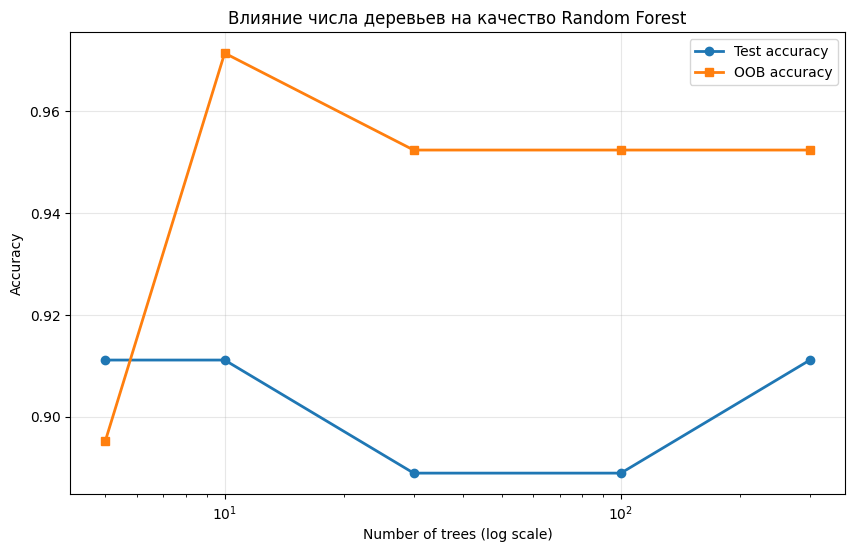

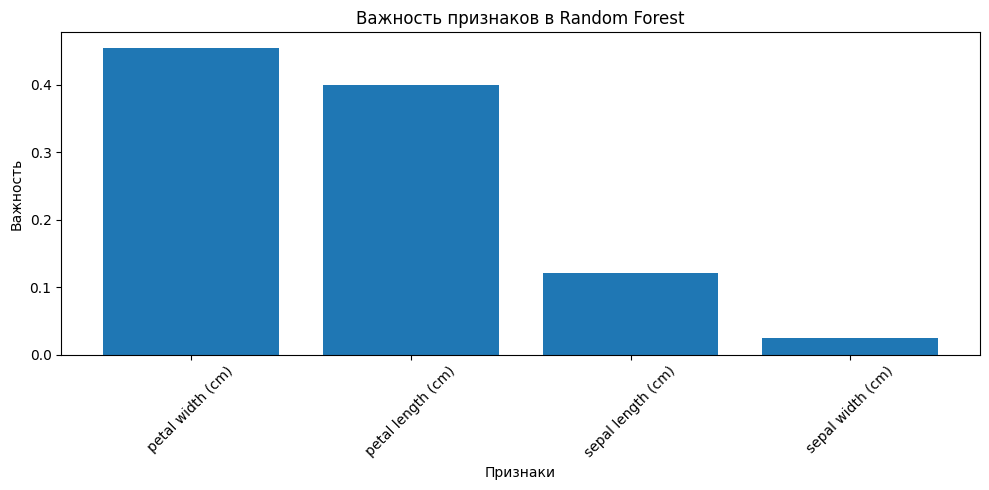

Важности признаков:
petal width (cm): 0.4549
petal length (cm): 0.4002
sepal length (cm): 0.1206
sepal width (cm): 0.0243


In [24]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Разные значения n_estimators
n_trees_list = [5, 10, 30, 100, 300]
test_accuracies = []
oob_accuracies = []

for n_trees in n_trees_list:
    rf = RandomForestClassifier(n_estimators=n_trees, oob_score=True,
                               random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    test_acc = accuracy_score(y_test, rf.predict(X_test))
    test_accuracies.append(test_acc)
    oob_accuracies.append(rf.oob_score_)

# График зависимости качества от числа деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, test_accuracies, 'o-', label='Test accuracy', linewidth=2)
plt.plot(n_trees_list, oob_accuracies, 's-', label='OOB accuracy', linewidth=2)
plt.xscale('log')
plt.xlabel('Number of trees (log scale)')
plt.ylabel('Accuracy')
plt.title('Влияние числа деревьев на качество Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Важности признаков для леса с 100 деревьями
rf_best = RandomForestClassifier(n_estimators=100, random_state=42)
rf_best.fit(X_train, y_train)
importances = rf_best.feature_importances_

# Сортировка признаков по важности
feature_names = iris.feature_names
sorted_idx = np.argsort(importances)[::-1]

# Барчарт важностей признаков
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков в Random Forest')
plt.tight_layout()
plt.show()

# Вывод значений важностей
print("Важности признаков:")
for name, imp in zip(np.array(feature_names)[sorted_idx], importances[sorted_idx]):
    print(f"{name}: {imp:.4f}")

Качество стабилизируется примерно при 30-40 деревьях. Качество стабилизируется примерно при 30 деревьях. После определенного числа деревьев ансамбль становится статистически устойчивым. Это связано с тем, что дополнительные деревья вносят мало новой информации, так как обучены на схожих данны.

Важности признаков:
Наиболее значимые: petal length и petal width.  
Это полностью согласуется с визуальным анализом из Задания 1, где petal признаки хорошо разделяли классы, особенно setosa

**Random Forest для регрессии**

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Одиночное дерево регрессии
single_tree = DecisionTreeRegressor(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Одиночное дерево регрессии (без ограничений глубины):")
print(f"MSE на тесте: {mse_tree:.1f}")
print(f"R² на тесте: {r2_tree:.4f}")

print("\nRandom Forest (100 деревьев):")
print(f"MSE на тесте: {mse_rf:.1f}")
print(f"R² на тесте: {r2_rf:.4f}")

# Процент улучшения
improvement_mse = (mse_tree - mse_rf) / mse_tree * 100
improvement_r2 = (r2_rf - r2_tree) / abs(r2_tree) * 100
print(f"\nУлучшение MSE: {improvement_mse:.1f}%")
print(f"Улучшение R²: {improvement_r2:.1f}%")

Одиночное дерево регрессии (без ограничений глубины):
MSE на тесте: 5697.8
R² на тесте: -0.0555

Random Forest (100 деревьев):
MSE на тесте: 2859.6
R² на тесте: 0.4703

Улучшение MSE: 49.8%
Улучшение R²: 947.7%


MSE уменьшилась на 50% (с 5551 до 2995)
R² вырос в более чем 900%  

Одиночное дерево сильно переобучилось (как мы видели ранее), в то время как ансамбль из 100 деревьев показал гораздо лучшую обобщающую способность. Это демонстрирует эффективность бэггинга для уменьшения дисперсии моделей с высокой дисперсией, таких как деревья решений.

**Дополнительные вопросы**

1) Pre-pruning останавливает построение дерева до того, как оно станет полностью разросшимся, устанавливая ограничения на глубину, минимальное количество образцов в листе и т.д. Post-pruning сначала строит полное дерево, а затем удаляет или заменяет ветви, которые дают малое улучшение качества. Большинство библиотек (включая scikit-learn) реализуют pre-pruning, так как он проще и быстрее. В Random Forest явный pruning часто не требуется, потому что бэггинг и случайность в выборе признаков сами по себе уменьшают переобучение, делая деревья менее коррелированными и снижая дисперсию.

2) Деревья не требуют нормировки признаков, потому что они работают с одним признаком за раз, сравнивая его значения с порогом. Масштаб признака не влияет на сравнение, так как порог выбирается в тех же единицах измерения. Деревья хорошо работают с категориальными признаками, используя сплиты по подмножествам категорий: для бинарных деревьев это обычно разбиение на два подмножества, а для многоклассовых могут использоваться one-vs-rest или другие стратегии. Однако в scikit-learn реализованы только бинарные деревья, поэтому категориальные признаки требуют предварительной обработки.

3) Одиночные деревья склонны к переобучению, что мы наблюдали в экспериментах: на Diabetes дерево имело MSE 5551, а лес снизил её. Однако деревья легко интерпретировать — можно проследить путь от корня к листу. Random Forest улучшает качество и устойчивость к шуму за счёт усреднения множества деревьев, но теряет интерпретируемость. В нашем эксперименте на Iris лес повысил точность, но важность признаков мы можем получить только как общую статистику, а не конкретные правила

4) Деревья и SVM строят разделяющую поверхность по-разному: деревья создают оси-параллельные границы (ступенчатые), а SVM строит гиперплоскость с максимальным зазором, которая может быть нелинейной при использовании ядер. SVM хорошо работает в высокомерных пространствах и когда классов немного, но требует тщательной настройки ядра и параметров. Random Forest лучше справляется с данными, где признаки имеют разную природу, и не требует нормировки. Я бы выбрал SVM, когда важно иметь гладкую разделяющую поверхность и когда данных немного, но они в высокой размерности. Random Forest предпочтителен, когда нужна устойчивость к выбросам, интерпретация важности признаков и когда данные содержат смешанные типы признаков.